In [1]:
import gemmi

In [2]:
structure = gemmi.read_structure("public/structures/1ft2.pdb")

In [9]:
structure.setup_entities()

In [11]:
ns = gemmi.NeighborSearch(structure[0], structure.cell, 5).populate()

In [10]:
cs = gemmi.ContactSearch(4.0)

In [13]:
res = cs.find_contacts(ns)

In [26]:
res[1].partner1.residue

<gemmi.Residue 55(PHE) with 11 atoms>

In [16]:
res[0].partner2

<gemmi.CRA A/LEU 56/N>

In [18]:
res[1].image_idx

0

In [49]:
interface_residues = {"A":set(), "B":set()}
for r in res:
    if r.partner1.chain.name != r.partner2.chain.name:
        #print(r.partner1.residue, r.partner1.chain.name,"-", r.partner2.residue)
        interface_residues[r.partner1.chain.name].add(r.partner1.residue.seqid.num)
        interface_residues[r.partner2.chain.name].add(r.partner2.residue.seqid.num)

In [40]:
r.partner1.residue.seqid.num

80

In [48]:
" or ".join(str(i) for i in sorted(interface_residues["B"]))

'1 or 24 or 33 or 36 or 37 or 38 or 40 or 41 or 42 or 43 or 44 or 45 or 67 or 68 or 69 or 85 or 86 or 87 or 88 or 89 or 90 or 91 or 93 or 94 or 95 or 97 or 98 or 100 or 103 or 104 or 107 or 125 or 129 or 132 or 141 or 142 or 144 or 146 or 147 or 148 or 149 or 152 or 195 or 196 or 197 or 198 or 202 or 234 or 235 or 236 or 240 or 241 or 242 or 244 or 245 or 246 or 251 or 271 or 274 or 275 or 278 or 279 or 280 or 281 or 283 or 291 or 292 or 293 or 294 or 315 or 320 or 321 or 322 or 323 or 324 or 327 or 328 or 329 or 330 or 331 or 334 or 389 or 390 or 391'

Fake data for boxplots

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import pandas as pd

In [81]:
rng = np.random.default_rng(0)

In [82]:
far = rng.random(size=1000) * 1.1 + 0.5
close = rng.random(size=1000) * 0.7

In [83]:
df = pd.DataFrame({"interface": close, "non-interface": far}).melt(var_name="group", value_name="distance")
cols = {
    "interface": colors.to_rgba("steelblue"),
    "non-interface": colors.to_rgba("crimson"),
}

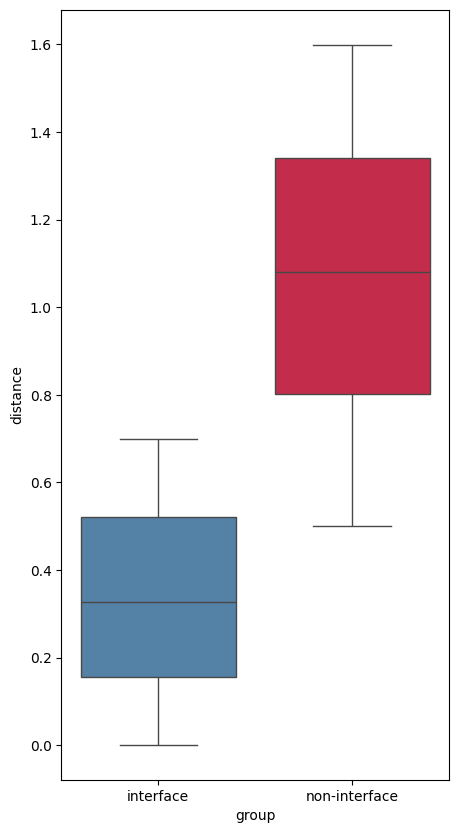

In [84]:
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=df, 
            x="group",
            hue="group",
            palette=cols,
            y="distance", 
            ax=ax)
plt.show()

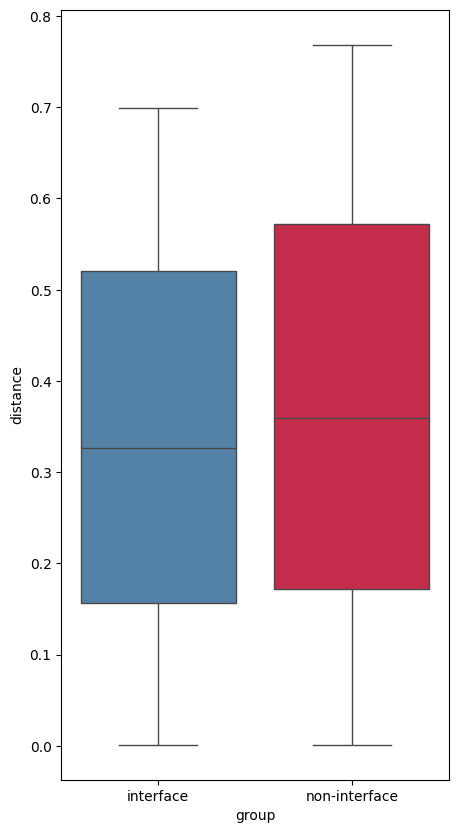

In [85]:
df = pd.DataFrame({"interface": close, "non-interface": 1.1*close}).melt(var_name="group", value_name="distance")
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=df, 
            x="group",
            hue="group",
            palette=cols,
            y="distance", 
            ax=ax)
plt.show()